<a href="https://colab.research.google.com/github/aniketddeshmukh/Minor_Lab/blob/main/ML_Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name : Aniket Deshmukh

Reg No : M1910013

---



In [ ]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Importing file
course = pd.read_csv("course_data_clean.csv")

In [ ]:
course.head()

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0


In [ ]:
course.describe()

,num_ratings,num_reviews,course_rating_int
count,14838.000000,14838.000000,14616.000000
mean,238.956733,45.831379,0.669540
std,308.523872,54.487423,0.470395
min,0.000000,1.000000,0.000000
25%,33.000000,7.000000,0.000000
50%,104.000000,22.000000,1.000000
75%,341.000000,66.000000,1.000000
max,2111.000000,253.000000,1.000000


In [ ]:
course.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14838 entries, 0 to 14837
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_code        14838 non-null  object 
 1   course_title       14838 non-null  object 
 2   num_ratings        14838 non-null  int64  
 3   useful             14836 non-null  object 
 4   easy               14835 non-null  object 
 5   liked              14835 non-null  object 
 6   num_reviews        14838 non-null  int64  
 7   reviews            14829 non-null  object 
 8   course_rating      14616 non-null  object 
 9   course_rating_int  14616 non-null  float64
dtypes: float64(1), int64(2), object(7)
memory usage: 1.1+ MB


In [ ]:
#Removing the rows that contains NULL value
course = course.dropna()

In [ ]:
#Splitting course_code column into course_unit and course_num
course[["course_unit", "course_num"]] = course["course_code"].str.split(" ", expand=True)
course

,course_code,course_title,num_ratings,useful,easy,liked,num_reviews,reviews,course_rating,course_rating_int,course_unit,course_num
0,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,go to office hours and practice,liked course,1.0,CS,115
1,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,One of my least favourite courses. Although th...,disliked course,0.0,CS,115
2,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,It starts with a very low pace but after midte...,disliked course,0.0,CS,115
3,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,Took this in 2018 with no programming experien...,liked course,1.0,CS,115
4,CS 115,Introduction to Computer Science 1,2111,21%,10%,23%,86,I loved everything about cs 115. Great instruc...,liked course,1.0,CS,115
...,...,...,...,...,...,...,...,...,...,...,...,...
14830,GSJ 410,Eighteenth-Century Women Writers,1,75%,75%,100%,1,This is a really wonderful course! Dr. Fraser ...,liked course,1.0,GSJ,410
14831,SOC 436,Alcohol and Well-Being,1,50%,25%,100%,1,While this course ended up being relatively in...,liked course,1.0,SOC,436
14832,BME 588,Special Topics in Biomechanics,1,25%,25%,0%,1,Personally did not find Computational Biomecha...,disliked course,0.0,BME,588
14833,ASL 102R,American Sign Language 2,1,100%,75%,100%,1,Took this online with Georgia Whalen. As it wa...,liked course,1.0,ASL,102R


In [ ]:
#Droping courses which has reviews less than 10
course.drop(course[course["num_reviews"] < 10].index, inplace=True)

In [ ]:
#Replacing type of below columns into integer
for i in ["useful", "easy", "liked"]:
    course[i] = course[i].str.replace("%", "")
    course[i] = course[i].astype("int")

In [ ]:
course.set_index("course_unit", inplace=True)

In [ ]:
#Dropping below columns
course.drop(["course_title", "reviews", "course_rating"], axis=1, inplace=True)

In [ ]:
course.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10075 entries, CS to SDS
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   course_code        10075 non-null  object 
 1   num_ratings        10075 non-null  int64  
 2   useful             10075 non-null  int64  
 3   easy               10075 non-null  int64  
 4   liked              10075 non-null  int64  
 5   num_reviews        10075 non-null  int64  
 6   course_rating_int  10075 non-null  float64
 7   course_num         10075 non-null  object 
dtypes: float64(1), int64(5), object(2)
memory usage: 708.4+ KB


In [ ]:
course_gp = course.groupby("course_unit").mean()
course_gp

,num_ratings,useful,easy,liked,num_reviews,course_rating_int
course_unit,,,,,,
ACTSC,89.957447,86.425532,60.425532,66.042553,17.744681,0.638298
AFM,222.188153,73.783972,55.519164,53.365854,48.139373,0.550523
AHS,61.648649,37.702703,88.243243,52.783784,22.243243,0.513514
AMATH,88.950000,88.150000,70.625000,81.375000,20.450000,0.875000
ANTH,35.000000,56.000000,76.000000,74.000000,13.000000,0.769231
...,...,...,...,...,...,...
SPCOM,322.571429,58.372294,69.909091,60.805195,81.467532,0.649351
STAT,369.975610,79.710801,56.341463,63.226481,73.797909,0.634146
STV,68.444444,21.296296,82.518519,53.074074,13.518519,0.592593


In [ ]:
for i in course_gp.index:
    course.loc[i, "course_rating_mean"] = course_gp.loc[i, "course_rating_int"]

In [ ]:
course.reset_index(inplace=True)

In [ ]:
course.groupby("course_unit").mean()["course_rating_int"]

course_unit
ACTSC    0.638298
AFM      0.550523
AHS      0.513514
AMATH    0.875000
ANTH     0.769231
           ...   
SPCOM    0.649351
STAT     0.634146
STV      0.592593
SYDE     0.575000
WKRPT    0.037037
Name: course_rating_int, Length: 69, dtype: float64

In [ ]:
course[course["course_code"].str.startswith("CS")].value_counts()

course_unit  course_code  num_ratings  useful  easy  liked  num_reviews  course_rating_int  course_num  course_rating_mean
CS           CS 135       687          90      69    89     146          1.0                135         0.761485              131
             CS 136       552          96      60    88     117          1.0                136         0.761485              101
             CS 246       621          65      60    60     112          1.0                246         0.761485               96
             CS 241       453          94      55    91     94           1.0                241         0.761485               84
             CS 245       537          24      56    28     99           0.0                245         0.761485               73
                                                                                                                             ... 
             CS 486       102          93      54    91     21           0.0                486  

In [ ]:
course

,course_unit,course_code,num_ratings,useful,easy,liked,num_reviews,course_rating_int,course_num,course_rating_mean
0,CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
1,CS,CS 115,2111,21,10,23,86,0.0,115,0.761485
2,CS,CS 115,2111,21,10,23,86,0.0,115,0.761485
3,CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
4,CS,CS 115,2111,21,10,23,86,1.0,115,0.761485
...,...,...,...,...,...,...,...,...,...,...
10070,SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317
10071,SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317
10072,SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317
10073,SDS,SDS 250R,17,72,45,29,12,0.0,250R,0.707317


<Figure size 1800x1440 with 0 Axes>

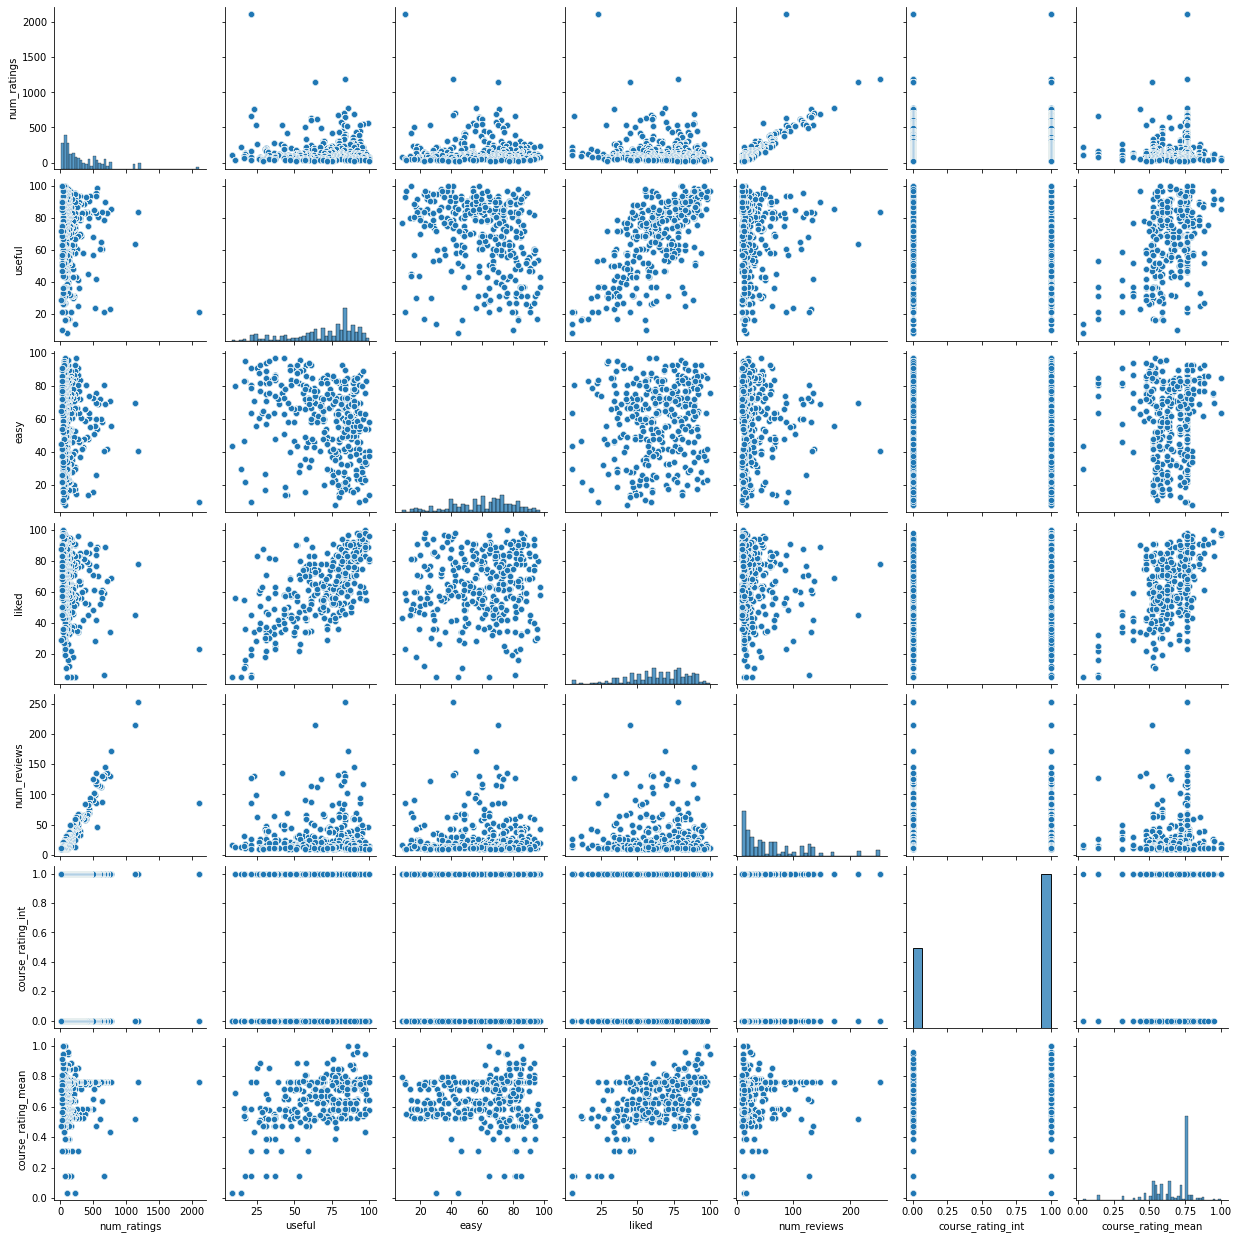

In [ ]:
plt.figure(figsize=(25,20))
sns.pairplot(data=course)
plt.show()

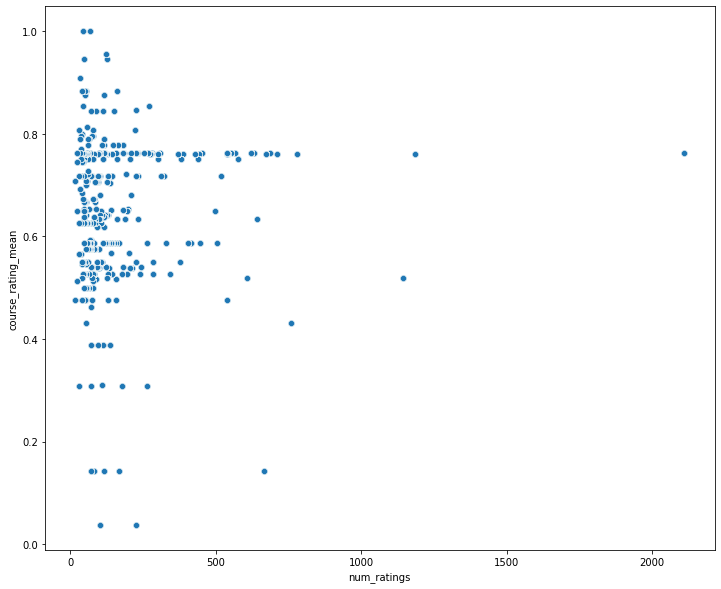

In [ ]:
plt.figure(figsize=(12,10))
sns.scatterplot(x="num_ratings", y="course_rating_mean", data=course)
plt.show()

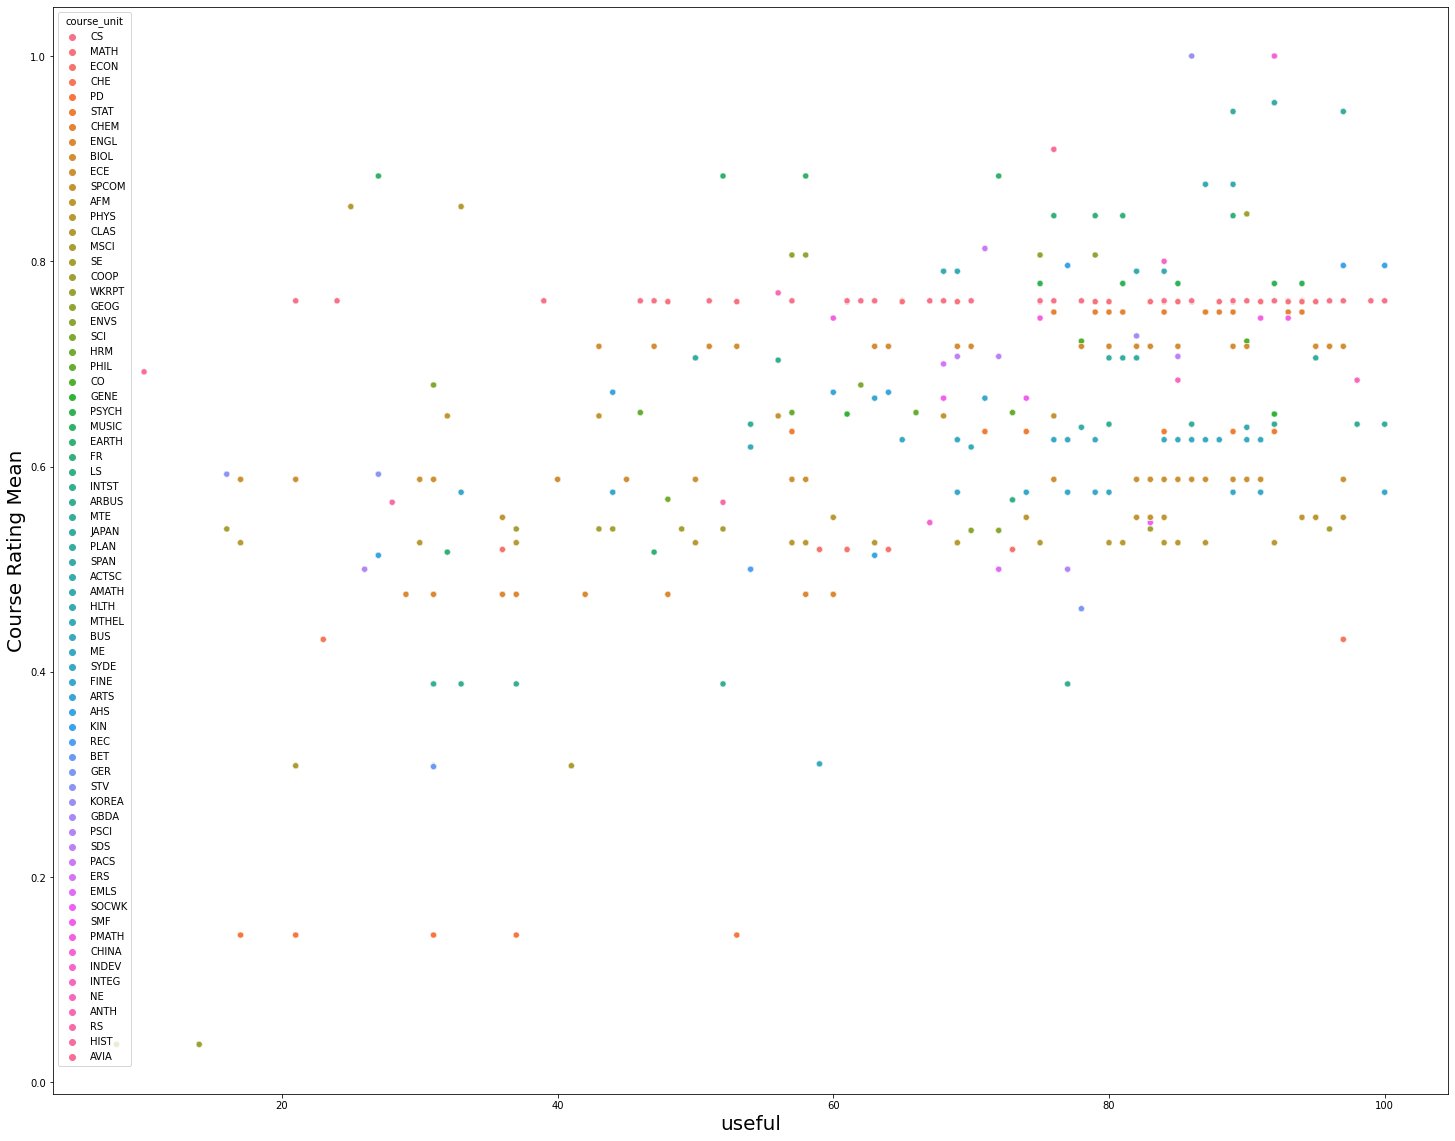

In [ ]:
plt.figure(figsize=(25,20))
sns.scatterplot(x="useful", y="course_rating_mean", hue="course_unit", data=course)
plt.xlabel("useful", fontsize = 20)
plt.ylabel("Course Rating Mean", fontsize = 20)
plt.show()

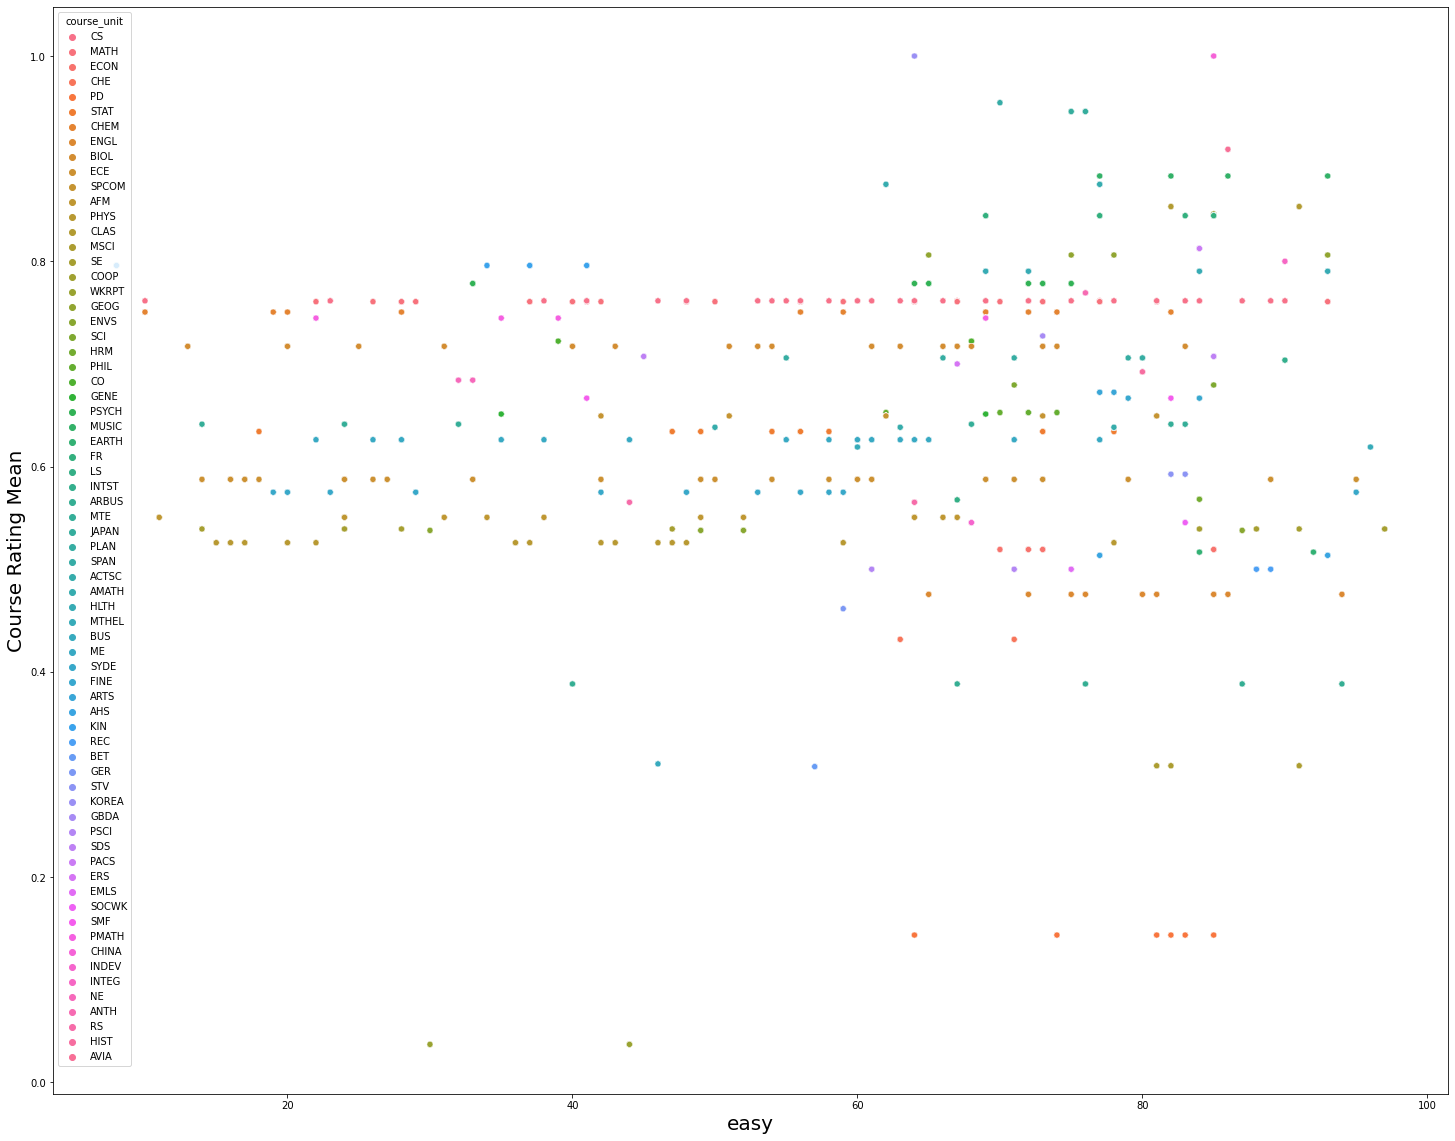

In [ ]:
plt.figure(figsize=(25,20))
sns.scatterplot(x="easy", y="course_rating_mean", hue="course_unit", data=course)
plt.xlabel("easy", fontsize = 20)
plt.ylabel("Course Rating Mean", fontsize = 20)
plt.show()


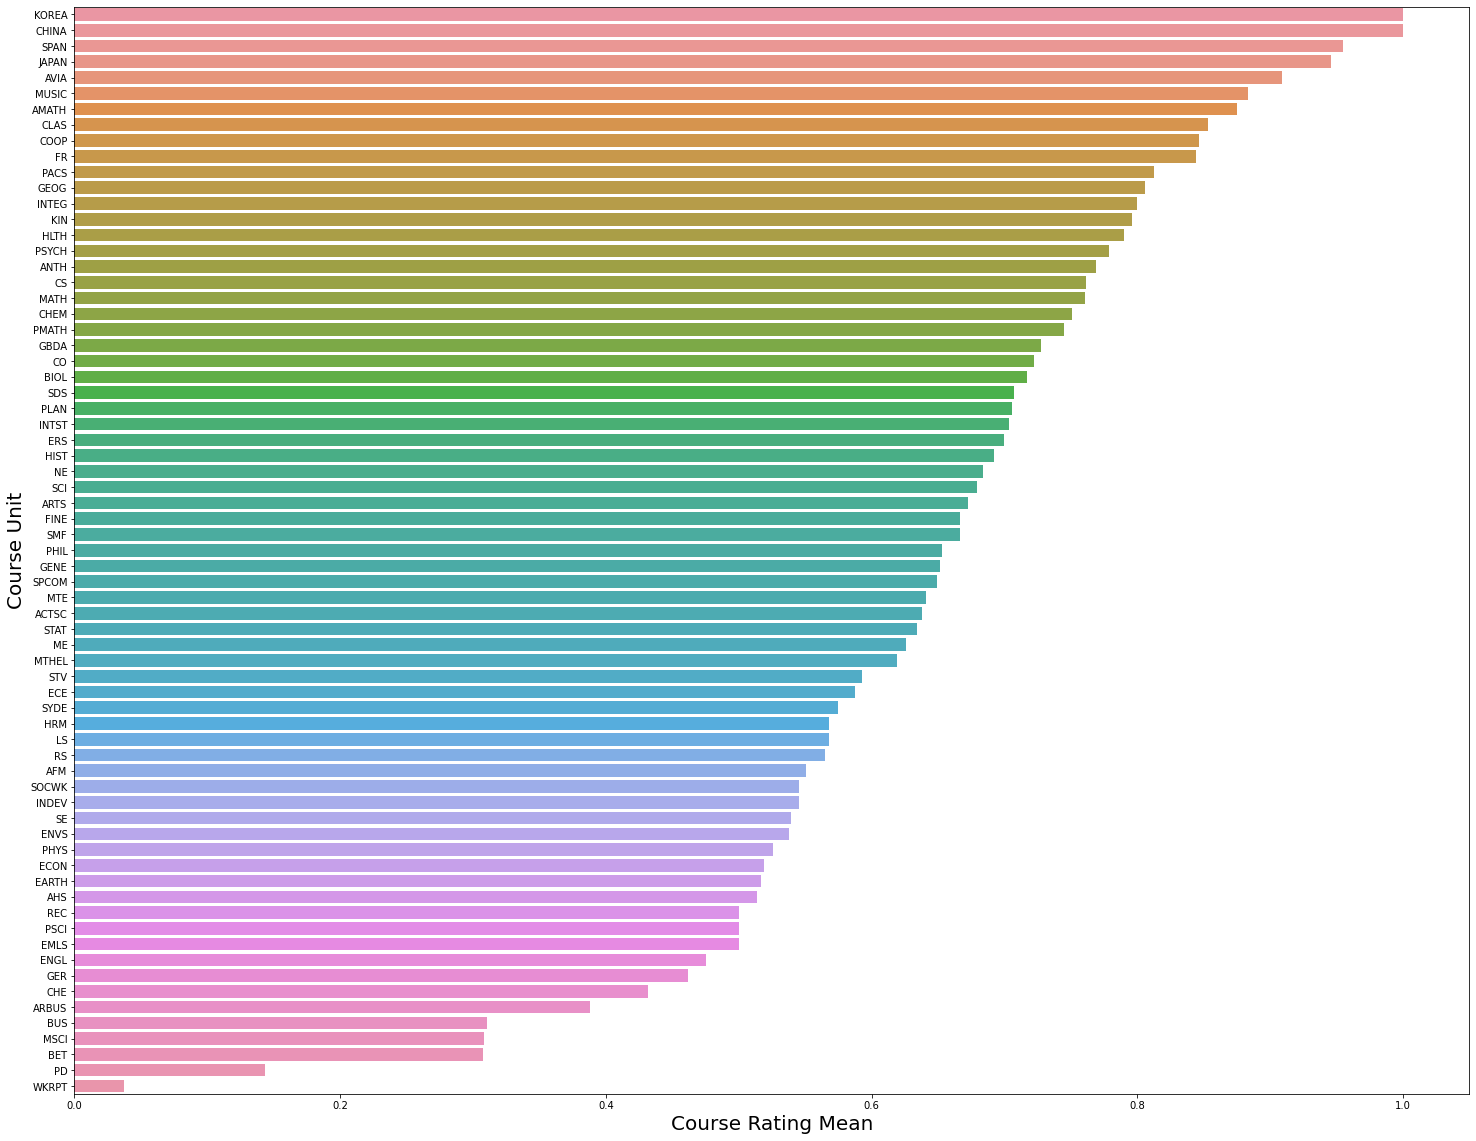

In [ ]:
course.sort_values("course_rating_mean", ascending=False, inplace=True)

plt.figure(figsize=(25,20))
sns.set_palette("Pastel1")
sns.barplot(x="course_rating_mean", y="course_unit", data=course)
plt.xlabel("Course Rating Mean", fontsize = 20)
plt.ylabel("Course Unit", fontsize = 20)
plt.show()